<h2><b>Heart Disease Prediction</b></h2>

<h4><u>Abstract</u><h4>
<p>One of the prominent diseases that affect many people during middle or old age is heart disease, and in many cases it eventually leads to fatal complications. Heart diseases are more prevalent in men than in women. According to statistics from WHO, it has been estimated that 24% of deaths due to non-communicable diseases in India are caused by heart ailments. One-third of all global deaths are due to heart diseases. Half of the deaths in the United States and in other developed countries are due to heart ailments

The aim of the Notebook is to check the quality of the data and determine the important features to predict if a patient is suffering from a heart disease or not. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot and box-plots using various Python libraries like matplotlib, seaborn, etc to answer the below questions about the dataset

<h4><u>Data Set</u><h4>
<p>

1. 14 features of a patient i.e age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num
2. num - The dependent variable which is either 1 (Diseased) or 0 (Not Diseased)
3. We have various patients ranging from an age of 29 to 79
4. There are 920 observations with a couple null values
</p>

<h4><u>Feature Information</u></h4>
<table>
  <tr>
    <th>Feature</th>
    <th>Feature Description</th>
    <th>Range of Values</th>
  </tr>
  <tr>
    <td>age</td>
    <td>Age of person in years</td>
    <td>29 to 79</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>Gender of Person (0=Female, 1=Male)</td>
    <td>0, 1</td>
  </tr>
  <tr>
    <td>cp</td>
    <td>Chest pain type <br> 0 - Angina <br> 1 - Atypical Type Angina <br> 2 - Non-angina pain <br> 3 - Asymptomatic</td>
    <td>0, 1, 2, 3</td>
  </tr>
  <tr>
    <td>trestbps</td>
    <td>Resting Blood Pressure in mm Hg</td>
    <td>94 to 200</td>
  </tr>
  <tr>
    <td>chol</td>
    <td>Serum cholesterol in mg/dl</td>
    <td>126 to 564</td>
  </tr>
  <tr>
    <td>fbs</td>
    <td>Fasting Blood Sugar in mg/dl</td>
    <td>0, 1</td>
  </tr>
  <tr>
    <td>restecg</td>
    <td>Resting Electrocardiographic Results</td>
    <td>0, 1, 2</td>
  </tr>
  <tr>
    <td>thalch</td>
    <td>Maximum Heart Rate Achieved</td>
    <td>71 to 202</td>
  </tr>
  <tr>
    <td>exang</td>
    <td>Exercise Induced Angina</td>
    <td>0, 1</td>
  </tr>
  <tr>
    <td>oldpeak</td>
    <td>ST depression induced by exercise relative to rest</td>
    <td>1 to 3</td>
  </tr>
  <tr>
    <td>slope</td>
    <td>Slope of the Peak Exercise ST segment</td>
    <td>1, 2, 3</td>
  </tr>
  <tr>
    <td>ca</td>
    <td>Number of major vessels colored by fluoroscopy</td>
    <td>0 to 3</td>
  </tr>
    <td>thal</td>
    <td>Duration of the exercise test in minutes <br> 3 – Normal, 6 – Fixed Defect, 7 – Reversible Defect</td>
    <td>3, 6, 7</td>
  </tr>
  </tr>
    <td>num</td>
    <td>Target variable <br></td>
    <td>0 - No Disease <br> 1 - Diseased</td>
  </tr>
</table>

In [ ]:
# Global imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Reading raw data set from Github
data = pd.read_csv('https://raw.githubusercontent.com/dev-kudli/heart-disease-prediction/dev/heart.csv')

In [ ]:
# Visualize first 5 rows
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Analyze null values for all columns
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<h4><u>Dropping columns and rows</u></h4>
<p>

1. It's evident that 'ca' and 'thal' have almost >50% of missing data. I have decided to drop the 2 columns as there is minimum information.
2. For the other missing values, we can drop the corresponsing rows as the data set is big enough to train the model
3. Dropping location since it's not required
</p>

In [ ]:
# Drop columns with very high missing data
data.drop(['thal', 'ca', 'slope', 'id', 'dataset'], axis=1, inplace=True)

# Drop rows with Null values
data.dropna(inplace=True)

In [ ]:
# Shpe of data
data.shape

(740, 11)

In [ ]:
# Statistical insights
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.097297,132.754054,220.136486,138.744595,0.894324,0.924324
std,9.408127,18.581250,93.614555,25.846082,1.087160,1.128882
min,28.000000,0.000000,0.000000,60.000000,-1.000000,0.000000
25%,46.000000,120.000000,197.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,231.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,271.000000,159.250000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


<h4><u>Data Transformation</u></h4>
Transforming non-numeric values into meaningful numbers

In [ ]:
# Map gender to boolean
sex = {
   'Male': 1,
   'Female': 0
}
data['sex'] = data.sex.map(sex)

# Map chest pressure to numeric
cp = {
   'asymptomatic': 0,
   'non-anginal': 1,
   'atypical angina': 2,
   'typical angina': 3
}
data['cp_int'] = data.cp.map(cp)

# Map exercise induced angina to boolean
data['exang'] = data.exang.apply(lambda x: 1 if x else 0)

# Map fasting blood sugar to boolean
data['fbs'] = data.fbs.apply(lambda x: 1 if x else 0)

# Map resting electrocardiographic results to integers
restecg = {
   'normal': 1,
   'lv hypertrophy': 0,
   'st-t abnormality': 2
}
data['restecg_int'] = data.restecg.map(restecg)

# Map output to either diseased or non-diseased
data['num'] = data.num.apply(lambda x: 1 if x>0 else 0)

In [ ]:
# Information about columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 919
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          740 non-null    int64  
 1   sex          740 non-null    int64  
 2   cp           740 non-null    object 
 3   trestbps     740 non-null    float64
 4   chol         740 non-null    float64
 5   fbs          740 non-null    int64  
 6   restecg      740 non-null    object 
 7   thalch       740 non-null    float64
 8   exang        740 non-null    int64  
 9   oldpeak      740 non-null    float64
 10  num          740 non-null    int64  
 11  cp_int       740 non-null    int64  
 12  restecg_int  740 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 80.9+ KB


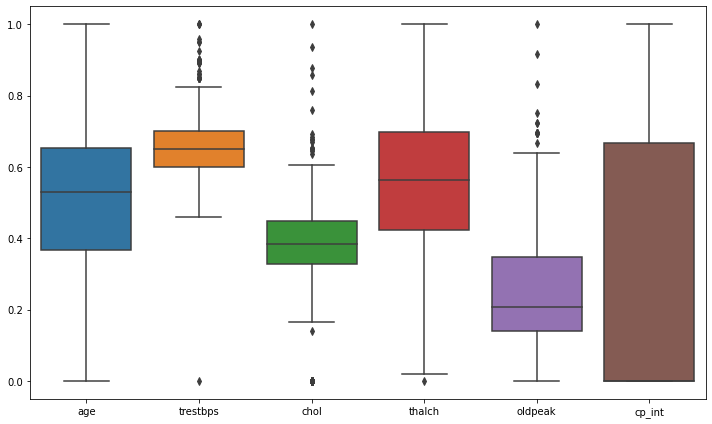

In [ ]:
# Box Plot of continuous variables
df = data.drop(['cp', 'sex', 'num', 'restecg', 'fbs', 'exang', 'restecg_int'], axis=1, inplace=False)
df_scaled = (df-np.min(df, axis=0))/(np.max(df, axis=0)-np.min(df, axis=0)).values
plt.figure(figsize=(10,6))
sns.boxplot(data=df_scaled)

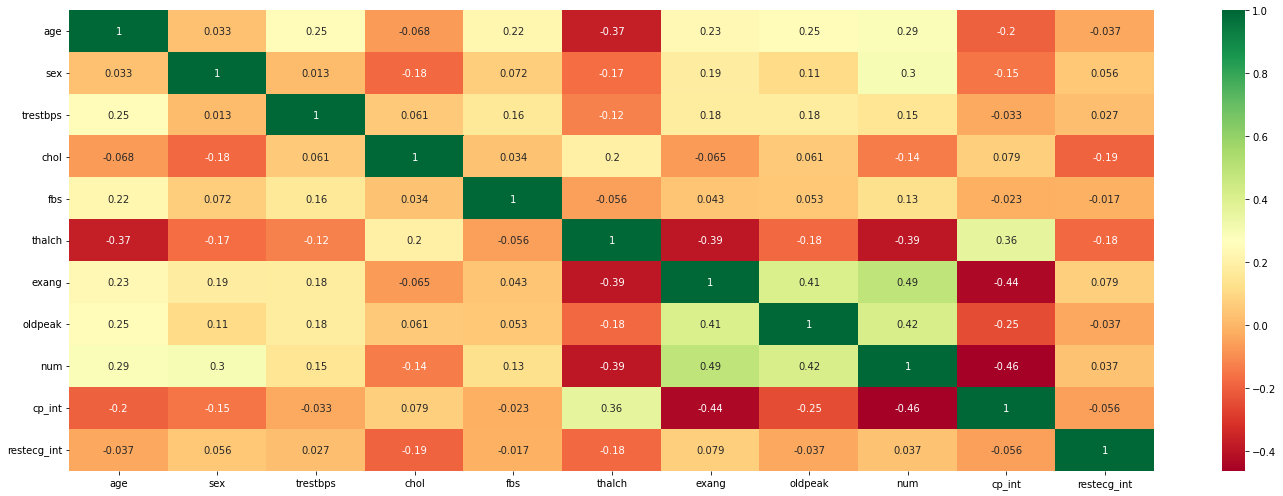

In [ ]:
# Heatmap to analyse correlation between variables
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot = True, cmap="RdYlGn")

<h4><u>Box Plot</u></h4>
<p>

1. Features like 'exang', 'oldpeak', 'ca' and 'thal' have the highest positive correlation wth dependent variable
2. Features like 'cp' and 'thalch' have most negative correlation
3. 'age' and 'sex' have some amount of correlation
4. Other features do not correlate much with the dependent variable
5. Coming to correlation among independent variables, thalch has the maximum correlation with 'thal', 'ca', 'exang' and 'age'
<p>

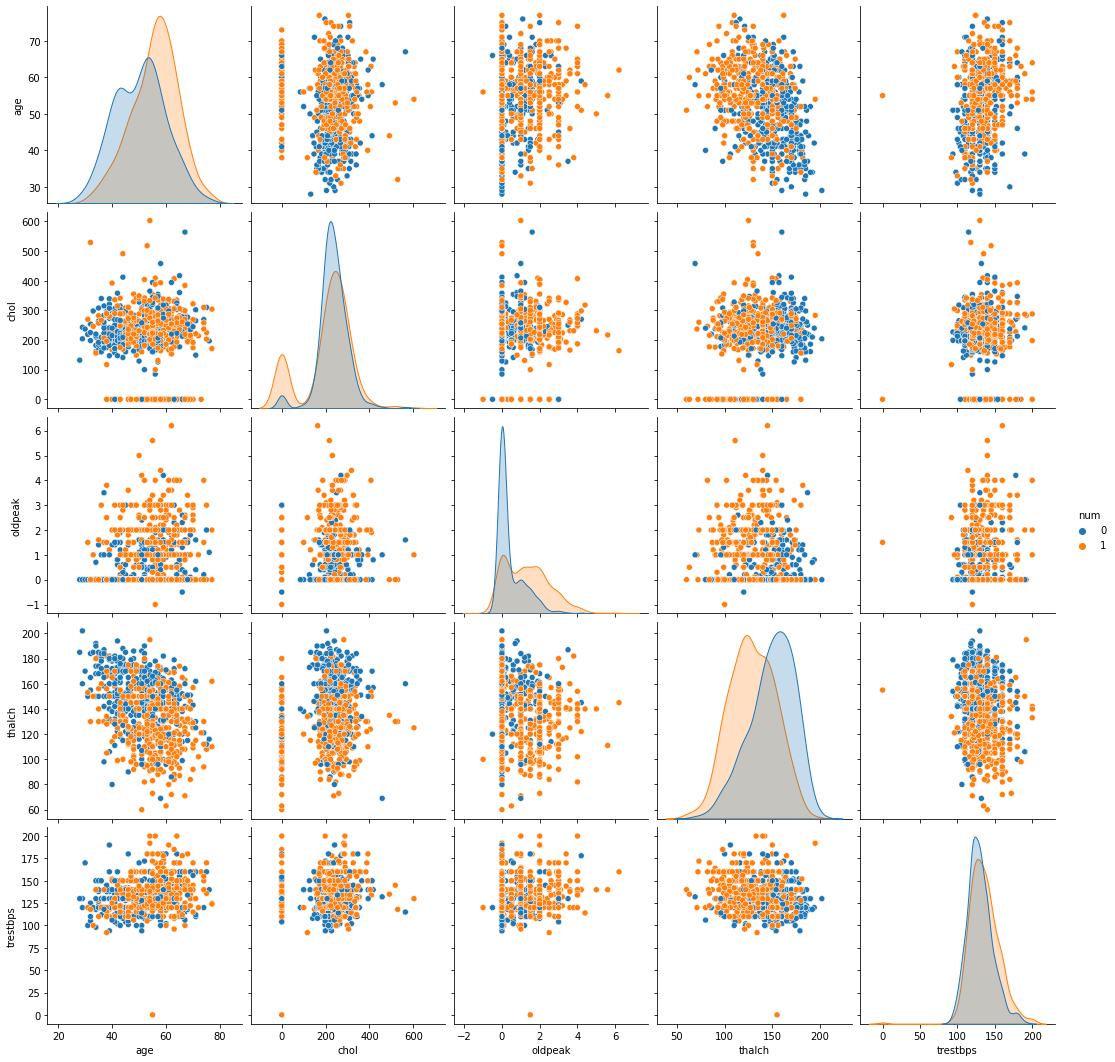

In [ ]:
# Visualizing continuous variables
df = data[['age', 'chol', 'oldpeak', 'thalch', 'trestbps', 'num']]
sns.pairplot(data=df, hue='num', height=3)

<h4>Correlation between independent variables</h4>

1. 'thalch' shows mild seperation between diseased and non-diseased
2. Other variables do not indicate much seperation

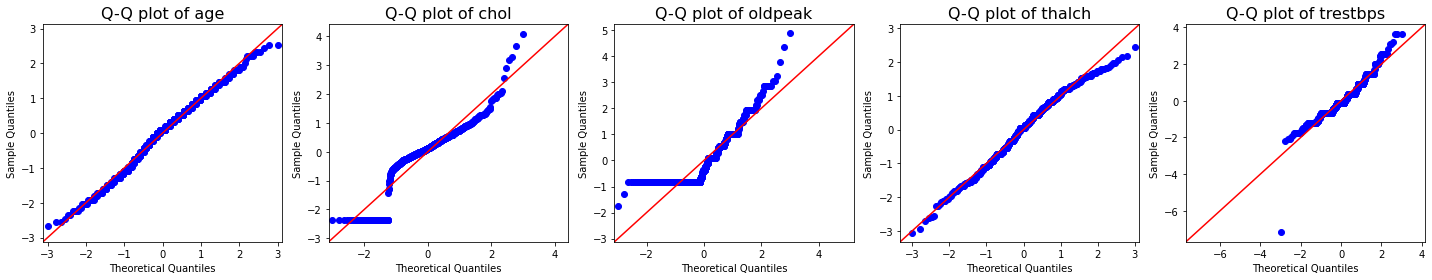

In [ ]:
# Checking the distribution of independent variables using Q-Q plot
df = data[['age', 'chol', 'oldpeak', 'thalch', 'trestbps']]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20,4))
axis = [ax1, ax2, ax3, ax4, ax5]
for idx, c in enumerate(df.columns[:]):
  qqplot(df[c], line='45', fit='True', ax=axis[idx])
  axis[idx].set_title("Q-Q plot of {}".format(c),fontsize=16)

plt.show()

In [ ]:
# Adding text columns for graphical purposes
data['num_text'] = data.num.replace({1: "Disease", 0: "No Disease"})
data['sex_text'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp_text'] = data.cp.replace({
    1: "Typical Angina", 
    2: "Atypical Angina", 
    3: "Non-anginal Pain",
    4: "Asymtomatic"
})

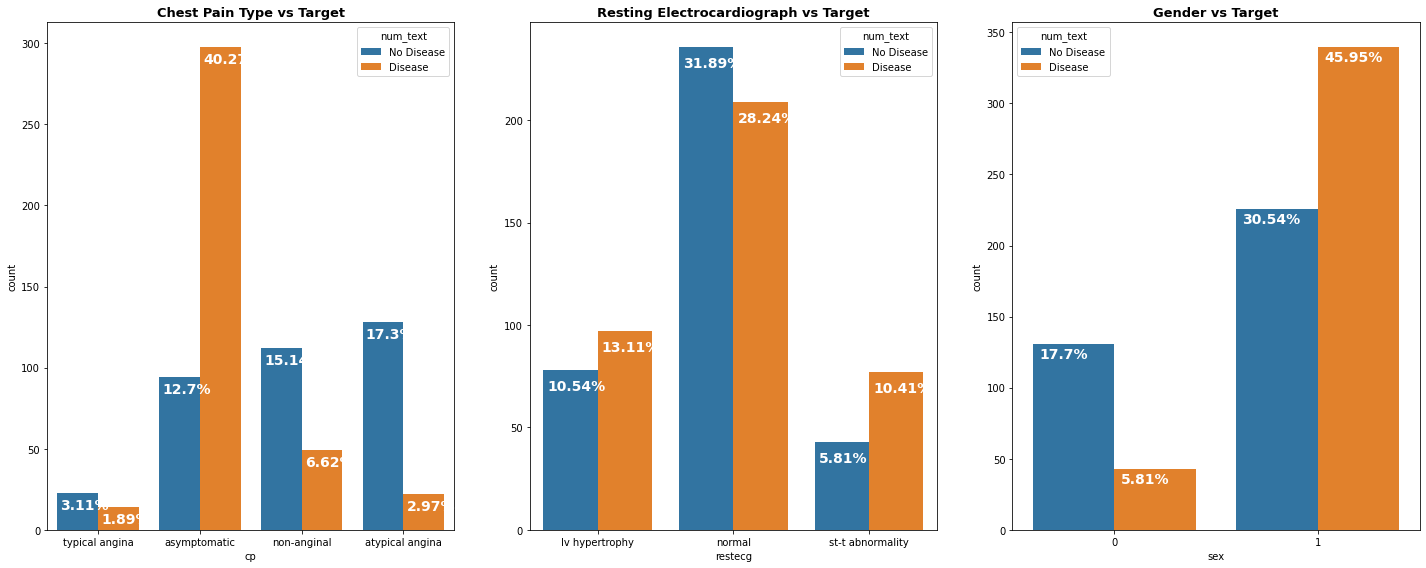

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [ ]:
# Alalysing categorical variables using bar graphs
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))
axis = [ax1, ax2, ax3]
columns = ['cp', 'restecg', 'sex']
names = ['Chest Pain Type', 'Resting Electrocardiograph', 'Gender']

for i, col in enumerate(columns):
  plt.figure(i)
  ax = sns.countplot(x=col, hue='num_text', data=data, ax=axis[i])
  axis[i].set_title(names[i] + ' vs Target', fontsize=13, weight='bold')
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
  total = sum(totals)
  for i in ax.patches:
      ax.text(i.get_x()+.03, i.get_height()-10,
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                  color='white', weight = 'bold') 

fig.subplots_adjust(wspace=1)
plt.show()

<h4>Feature Selection - SelectKBest method</h4>

In [ ]:
# Filter independent and dependent variables
X = data[['age', 'sex', 'chol', 'trestbps', 'fbs', 'restecg_int', 'thalch', 'exang', 'cp_int']]
y = data['num']

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

# Print 10 best features
print(featureScores.nlargest(9,'Score'))

         Specs       Score
6       thalch  552.993570
2         chol  545.926064
8       cp_int  181.599476
7        exang  106.691709
0          age  101.466539
3     trestbps   43.183139
1          sex   15.668377
4          fbs    9.882560
5  restecg_int    0.419068


<h4>Feature Selection - OLS method</h4>

In [ ]:
# Using OLS to find 'p' and 't' values for feature selection
model = sm.OLS(data['num'], data[['age', 'sex', 'trestbps', 'oldpeak', 'chol', 'fbs', 'restecg_int', 'cp_int', 'exang']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    num   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              209.5
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                   9.88e-196
Time:                        04:54:35   Log-Likelihood:                         -334.49
No. Observations:                 740   AIC:                                      687.0
Df Residuals:                     731   BIC:                                      728.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0051      0.001      3.665      0.000       0.002       0.008
sex             0.2046      0.033      6.153      0.000       0.139       0.270
trestbps        0.0008      0.001      1.295      0.196      -0.000       0.002
oldpeak         0.0983      0.015      6.769      0.000       0.070       0.127
chol           -0.0004      0.000     -2.951      0.003      -0.001      -0.000
fbs             0.0866      0.040      2.162      0.031       0.008       0.165
restecg_int    -0.0077      0.023     -0.343      0.732      -0.052       0.036
cp_int         -0.1384      0.017     -8.269      0.000      -0.171      -0.106
exang           0.2247      0.035      6.460      0.000       0.156       0.293
==============================================================================
Omnibus:                        2.063   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.882
Skew:                           0.032   Prob(JB):                        0.390
Kurtosis:                       2.761   Cond. No.                         784.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'num', 'cp_int', 'restecg_int', 'num_text',
       'sex_text', 'cp_text'],
      dtype='object')

In [ ]:
# One hot encoding for chest pain
data_hot = data.copy(deep=True)
cp = pd.get_dummies(data['cp'])
data_hot = pd.concat([data, cp], axis=1, join="inner")

In [ ]:
data_hot.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,cp_int,restecg_int,num_text,sex_text,cp_text,asymptomatic,atypical angina,non-anginal,typical angina
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,0,3,0,No Disease,Male,typical angina,0,0,0,1
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,1,0,0,Disease,Male,asymptomatic,1,0,0,0
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,1,0,0,Disease,Male,asymptomatic,1,0,0,0
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,0,1,1,No Disease,Male,non-anginal,0,0,1,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,0,2,0,No Disease,Female,atypical angina,0,1,0,0


<h4>Feature Selection</h4>

1. From the above methods, we can eliminate 'sex', 'fbs' and 'restecg' as they have very low scores given by SelectKBest
2. 'restecg' and 'oldpeak' have a 'p value' of >0.05. Although this methos is not very powerful in classification. Let us remove them for now
3. Following features are selected for the training of the initial model. 'age', 'chol', 'thalch', 'exang', 'oldpeak' and 'cp'

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into testing and training (80/20)
y = data_hot['num']
X = data_hot[['age', 'chol', 'thalch', 'exang', 'oldpeak', 'typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0)).values
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0)).values

Area under the curve =  0.89


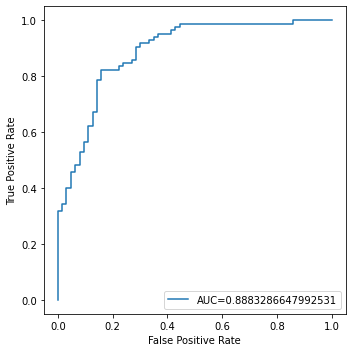

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Building logical regression model
logre = LogisticRegression()
logre.fit(X_train,y_train)

# Predict using the model
y_pred_proba = logre.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Area under the curve
print('Area under the curve = ', round(auc, 2))
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

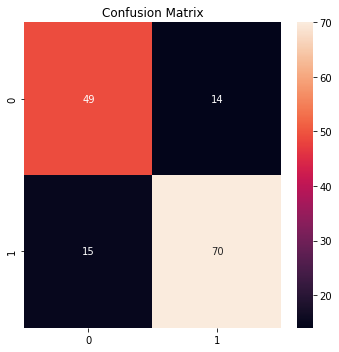

In [ ]:
# Confusion matrix for predicted values
y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
    actual.append(i)
    predcition.append(j)
    
dic = {
  'Actual':actual,
  'Prediction':predcition 
}

result  = pd.DataFrame(dic)

fig, ax1 = plt.subplots(ncols=1)
plt.rcParams["figure.figsize"] = [5, 4]

cm = confusion_matrix(result['Actual'], result['Prediction'])
sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
ax1.set_title('Confusion Matrix')
fig.subplots_adjust(wspace=1)

plt.show()

In [ ]:
# Remove outliers using Interquantile Range (IQR) method
cols = ['age', 'chol', 'trestbps', 'oldpeak']

Q1 = data_hot[cols].quantile(0.25)
Q3 = data_hot[cols].quantile(0.75)
IQR = Q3 - Q1

# Count number of outliers removed
data_ro = data_hot[~((data_hot[cols] < (Q1 - 1.5 * IQR)) | (data_hot[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Outliers removed =', data_hot.shape[0] - data_ro.shape[0])

Outliers removed = 127


<h4>Logistic Regression after removing outliers</h4>

Area under the curve =  0.85


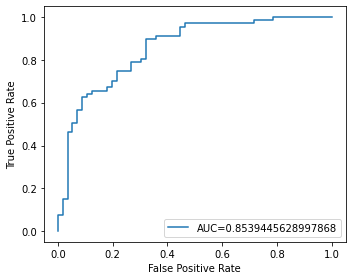

In [ ]:
# Choose required columns for the model
y = data_ro['num']
X = data_ro[['age', 'chol', 'thalch', 'exang', 'oldpeak', 'typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']]

# Create test and train data and scale it down
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0)).values
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0)).values

# Log regression model
logre = LogisticRegression()
logre.fit(X_train,y_train)

# Predict the output for testing data
y_pred_proba = logre.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Area under the curve
print('Area under the curve = ', round(auc, 2))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.rcParams["figure.figsize"] = (5,5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h4>Train and Test data split</h4>

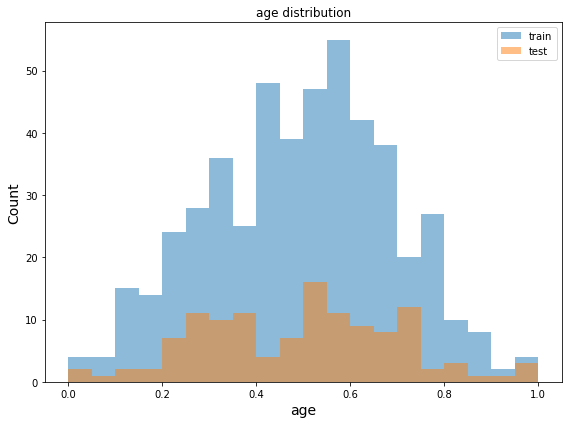

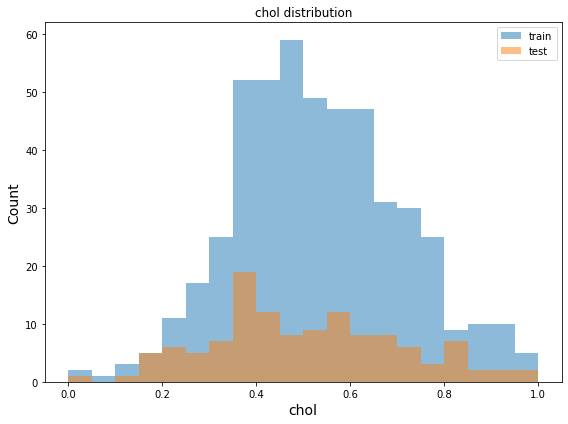

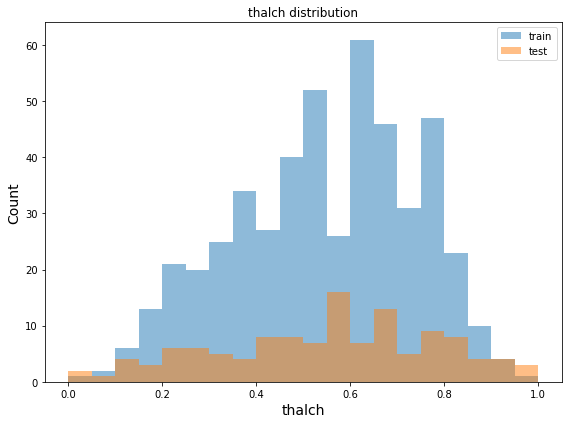

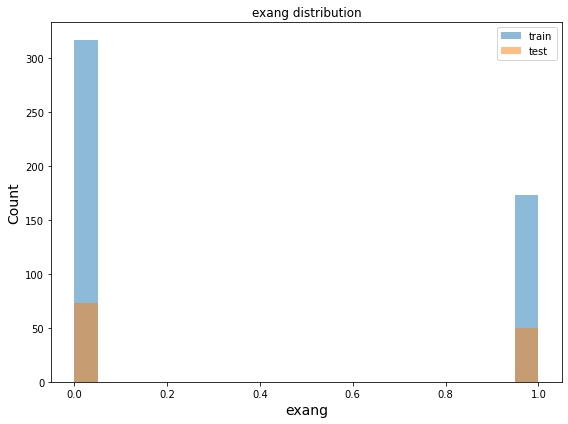

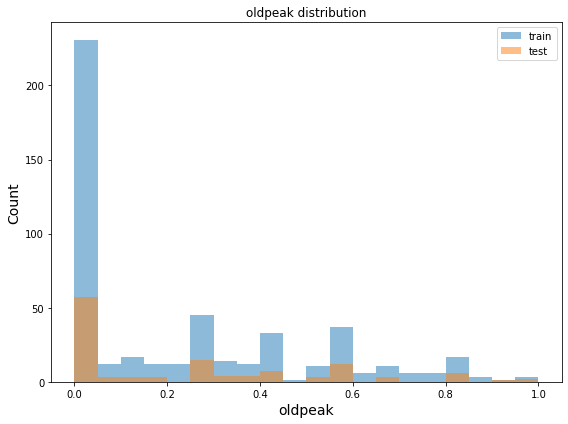

In [ ]:
# Plotting testing and training data to see the histogram
cols = ['age', 'chol', 'thalch', 'exang', 'oldpeak']
for c in cols:
  plt.figure(figsize=(8,6))
  plt.hist(X_train[c], bins=20, alpha=0.5, label="train")
  plt.hist(X_test[c], bins=20, alpha=0.5, label="test")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

<h4>KNN Imputation of Chest Pain Type</h4>

2. Chest Pain has 4 categories. Let's create missing data and use KNN imputation with 5 nearest neighbours for 1%, 5% and 10% of the values
3. Correlation matrix below gives us the accuracy at which the missing values were imputed

In [ ]:
# Funtion to create % of missing data
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
# Create copies of variable we're trying to impute (Chest Pain)
data['cp_1_percent'] = data[['cp_int']].copy(deep=True)
data['cp_5_percent'] = data[['cp_int']].copy(deep=True)
data['cp_10_percent'] = data[['cp_int']].copy(deep=True)

# Create missing data
create_missing(data, 0.01, 'cp_1_percent')
create_missing(data, 0.05, 'cp_5_percent')
create_missing(data, 0.1, 'cp_10_percent')

# Verify % of missing data
print('Missing Values in %')
print(data[['cp', 'cp_1_percent', 'cp_5_percent', 'cp_10_percent']].isnull().sum() * 100 / len(data))

# KNN imputation
neighbours = 5
knn = KNNImputer(n_neighbors = neighbours)
# Imputing 1% data
temp = data[['age', 'chol', 'thalch', 'exang', 'oldpeak', 'cp_int', 'num', 'cp_1_percent', 'cp_5_percent', 'cp_10_percent']]
data1 = pd.DataFrame(knn.fit_transform(temp), columns = temp.columns)
data1['cp_1_percent'] = data1['cp_1_percent'].apply(lambda x: round(x))
data1['cp_5_percent'] = data1['cp_5_percent'].apply(lambda x: round(x))
data1['cp_10_percent'] = data1['cp_10_percent'].apply(lambda x: round(x))

Missing Values in %
cp                0.000000
cp_1_percent      0.945946
cp_5_percent      5.000000
cp_10_percent    10.000000
dtype: float64


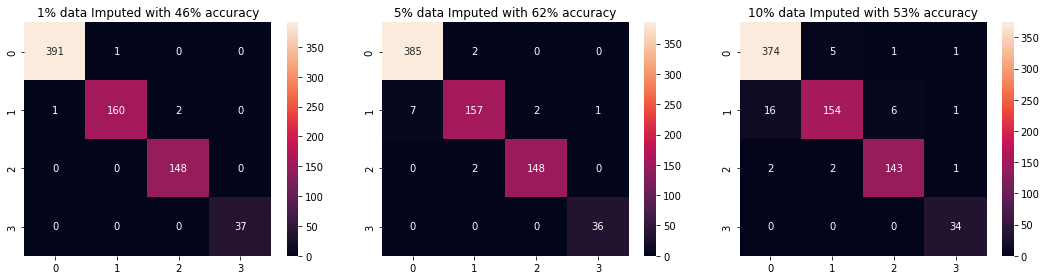

In [ ]:
# Correlation matrix for imputed values
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(wspace=1)

axis = [ax1, ax2, ax3]
# datasets = [data1, data5, data10]
datasets = [data1, data1, data1]

col = ['cp_1_percent', 'cp_5_percent', 'cp_10_percent']
percent = [1, 5, 10]

cm = []
for idx, c in enumerate(col):
  matrix = confusion_matrix(datasets[idx][col[idx]], data['cp_int'])
  cm.append(matrix)
  sns.heatmap(cm[idx], annot=True, fmt='d', ax=axis[idx])
  diff = cm[idx].sum(axis=1).sum()-cm[idx].diagonal().sum()
  missing = data.shape[0]/100*percent[idx]
  axis[idx].set_title(str(percent[idx]) + '% data Imputed with ' + str(round(100-(diff/missing)*100)) + '% accuracy')

fig.subplots_adjust(wspace=1)
plt.show()

<h4>Imputation of Chest Pain Type using Mode</h4>

2. Let's create missing data and 1%, 5% and 10% of missing values with mode
3. Correlation matrix below gives us the accuracy at which the missing values were imputed

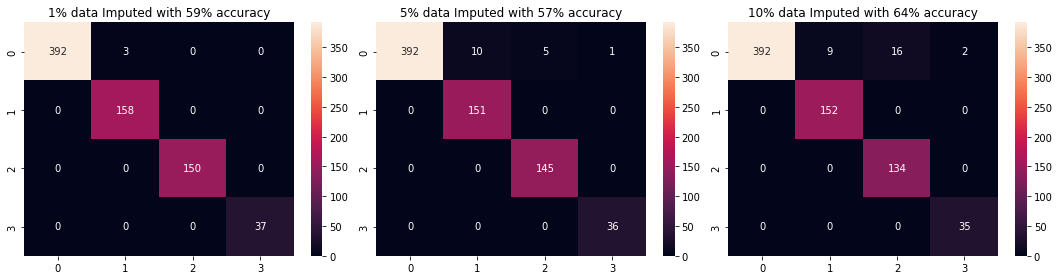

In [ ]:
from statsmodels.multivariate.multivariate_ols import matrix_rank
import statistics

col = ['cp_1_percent', 'cp_5_percent', 'cp_10_percent']
percent = [1, 5, 10]
m = statistics.mode(data['cp_int'])

# Create missing data
for idx, c in enumerate(col):
  data[c] = data[['cp_int']].copy(deep=True)
  create_missing(data, percent[idx]/100, c)
  data[c].fillna(m, inplace=True)

# Generate Plot
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
axis = [ax1, ax2, ax3]
fig.subplots_adjust(wspace=1)

# Confusion Matrix and Accuracy of imputation
cm = []
for idx, c in enumerate(col):
  matrix = confusion_matrix(data[c], data['cp_int'])
  cm.append(matrix)
  sns.heatmap(cm[idx], annot=True, fmt='d', ax=axis[idx])
  diff = cm[idx].sum(axis=1).sum()-cm[idx].diagonal().sum()
  missing = data.shape[0]/100*percent[idx]
  axis[idx].set_title(str(percent[idx]) + '% data Imputed with ' + str(round(100-(diff/missing)*100)) + '% accuracy')

plt.show()

<h4>Imputation of Chest Pain Type using Mean</h4>

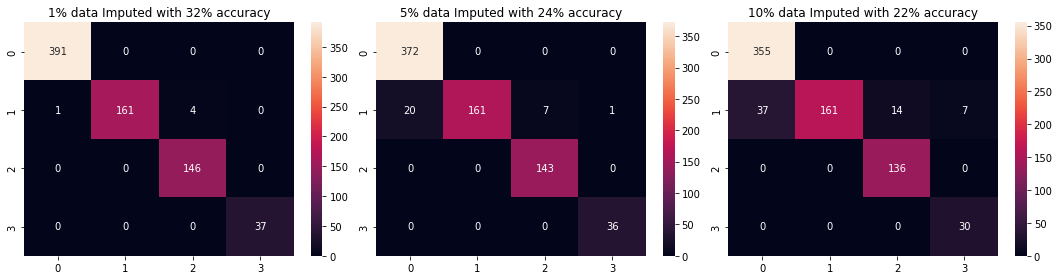

In [ ]:
# Calculate mean
m = round(statistics.mean(data['cp_int']))

# Create missing data
for idx, c in enumerate(col):
  data[c] = data[['cp_int']].copy(deep=True)
  create_missing(data, percent[idx]/100, c)
  data[c].fillna(m, inplace=True)

# Generate Plot
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
axis = [ax1, ax2, ax3]
fig.subplots_adjust(wspace=1)

# Confusion Matrix and Accuracy of imputation
cm = []
for idx, c in enumerate(col):
  matrix = confusion_matrix(data[c], data['cp_int'])
  cm.append(matrix)
  sns.heatmap(cm[idx], annot=True, fmt='d', ax=axis[idx])
  diff = cm[idx].sum(axis=1).sum()-cm[idx].diagonal().sum()
  missing = data.shape[0]/100*percent[idx]
  axis[idx].set_title(str(percent[idx]) + '% data Imputed with ' + str(round(100-(diff/missing)*100)) + '% accuracy')

plt.show()

<h4>Assignment Questions</h4>

Q) <i>Which independent variables are useful to predict a target (dependent variable)?</i><br>
A) Below is the rank of the dependent variables<br>
1. thalch
2. chol
3. cp
4. exang
5. age

<hr>

Q) <i>Which independent variables have missing data? How much?</i><br>
A: Apart from 'age', 'cp' and 'sex', all other variables have missing data which is shown at the beginning.
<hr>

Q) <i>Do the training and test sets have the same data?</i><br>
A: Yes, the distributions look fairly similar for the features chosen to build the final model
<hr>

Q) <i>In the predictor variables independent of all the other predictor variables?</i><br>
A: There is slight correlation observed between 'thalch' and 'chol', 'trestbps' but other features do not show much correlation
<hr>

Q) <i>Which predictor variables are the most important?</i><br>
A: A) Important features are<br>
1. thalch
2. chol
3. cp
4. exang
5. age

<hr>

Q) <i>Do the ranges of the predictor variables make sense?</i><br>
A) Observations made from box plot with respective to ranges:
1. 'chol' has outliers meaning some patients have very high/very low cholestrol levels
2. 'trestbps' have outliers indicating that some patients have very high resting blood pressure
3. 'oldpeak' has lot of outliers indicating high depression in the ECG output during exercise
3. 'age', 'thalch' and 'slope' seem to be concentrated within the respective ranges

<hr>

Q) <i>What are the distributions of the predictor variables?</i><br>
A) Looking at the Q-Q plots for conrinuous variables
1. 'age', 'thalch' and 'trestbps' roughly follow normal distribution
2. 'chol' and 'oldpeak' is not normally distribued
3. 'sex' has 2 categories - male and females
4. 'cp' has 4 categories

<h4><u>Conclusion</u></h4>
After analysing the distribution of features contributing to presense of heart disease, the most important features are as follows (ranked highest to lowest)

1. thalch
2. chol
3. cp
4. exang
5. age

The logical regression model has an accuracy of 0.88.
Few imputation methods were used to impute the values for Chest Pain Type (cp) with a rough accuracy of 50%.


<h4><u>Refernces</u></h4>

1. Sckit learn offcial documentation
2. Karan Raman Agrawal's KNN Imputation [Notebook](https://colab.research.google.com/drive/1wEfzH165Ycm_EqVgwSz_r7SvILuj0KRW?usp=sharing)
3. Linear regression for predicting rings of [Abalones](https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb)

<h4><u>MIT License</u></h4>

Copyright (c) 2019 Wok

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.